# *MALL DATASET*

**ANN**

### *(1)LOAD THE DATASET*

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,28.0
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 198, dtype: bool

# *(2) DISPLAY FIRST FEW,LAST FEW ELEMENTS.GIVE DIMENSION*

In [ ]:
df.head(8)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
5,6,Female,22,17.0,76.0
6,7,Female,35,18.0,6.0
7,8,Female,23,18.0,94.0


In [ ]:
df.tail(8)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
192,193,Male,33,113.0,8.0
193,194,Female,38,113.0,91.0
194,195,Female,47,120.0,16.0
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,28.0
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0
199,200,Male,30,137.0,83.0


In [ ]:
df.shape

(200, 5)

In [ ]:
df[2:10]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
5,6,Female,22,17.0,76.0
6,7,Female,35,18.0,6.0
7,8,Female,23,18.0,94.0
8,9,Male,64,19.0,3.0
9,10,Female,30,19.0,72.0


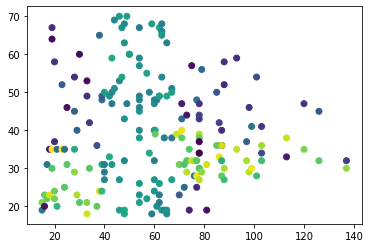

In [ ]:
import matplotlib.pyplot as plt
x=df.drop("Spending Score (1-100)",axis=1)
y=df["Spending Score (1-100)"]
plt.scatter(x["Annual Income (k$)"],x["Age"],c=y)
plt.show()

# *(3) DISPLAY  , REMOVE DUPLICATE ELEMENT FROM DATASET,REPLACE NULL ELEMENT*

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        3
Spending Score (1-100)    2
dtype: int64

In [ ]:
df.dropna(axis=0,subset=["Spending Score (1-100)"],inplace=True)

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64

In [ ]:
mean=df["Annual Income (k$)"].mean()
df["Annual Income (k$)"].fillna(value = mean,inplace=True)

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.drop_duplicates()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,28.0
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [ ]:
df.shape

(198, 5)

# *(4) USE ANN*

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df.Genre=l.fit_transform(df.Genre)
df.head(8)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39.0
1,2,1,21,15.0,81.0
2,3,0,20,16.0,6.0
3,4,0,23,16.0,77.0
4,5,0,31,17.0,40.0
5,6,0,22,17.0,76.0
6,7,0,35,18.0,6.0
7,8,0,23,18.0,94.0


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


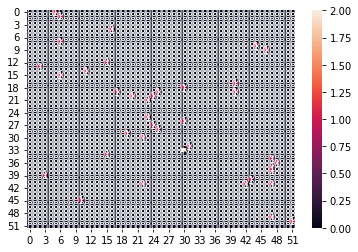

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
sc=StandardScaler()
x=df.drop("Spending Score (1-100)",axis=1)
y=df["Spending Score (1-100)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
mlp=MLPClassifier(alpha=1,hidden_layer_sizes=(198,5),max_iter=500,activation="relu",solver="adam")
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)
cn=confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True)

In [ ]:
accuracy_score(y_pred,y_test)

0.025

# *SVM*

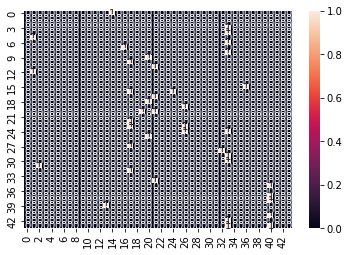

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
sc=StandardScaler()
x=df.drop("Spending Score (1-100)",axis=1)
y=df["Spending Score (1-100)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
clf=SVC()
clf.fit(x_train,y_train)
sns.heatmap(cn,annot=True)

In [ ]:
clf.support_vectors_[0:10]

array([[ 1.0320103 ,  1.15044748, -0.36634325,  0.69625125],
       [-1.54285485,  1.15044748,  1.80695712, -1.54701436],
       [-1.13087643,  1.15044748,  1.01008032, -1.01471405],
       [ 0.72302648, -0.86922699,  1.2998537 ,  0.58218689],
       [ 1.10067337,  1.15044748, -1.45299343,  0.8103156 ],
       [-1.3025341 , -0.86922699,  0.5029769 , -1.31888565],
       [-1.57718638, -0.86922699, -0.2938999 , -1.58503581],
       [-1.64584945, -0.86922699, -1.38055009, -1.66107871],
       [ 0.65436341, -0.86922699,  0.35809021,  0.50614399],
       [ 0.5513688 ,  1.15044748,  0.57542025,  0.43010109]])

In [ ]:
accuracy_score(y_pred,y_test)

0.025

# *Naive-Bayes*

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
sc=StandardScaler()
x=df.drop("Spending Score (1-100)",axis=1)
y=df["Spending Score (1-100)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
ml3=GaussianNB()
ml3.fit(x_train,y_train)
y_pred=ml3.predict(x_test)
accuracy_score(y_pred,y_test)


0.075

In [ ]:
y_pro=ml3.predict_proba(x_test)
y_pro

array([[0.00000000e+000, 0.00000000e+000, 4.21701683e-240, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 4.90254821e-019, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

# *LINEAR REGRESSION*

In [ ]:
x=df.drop("Annual Income (k$)",axis=1)
y=df["Annual Income (k$)"]
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
R= LinearRegression()
R.fit(x,y)
y_pred=R.predict(x)
Error = mean_squared_error(y,y_pred)
print(Error)
print(y_pred)

32.04106263243425
[ 15.95172766  16.28767798  17.00064677  17.25354628  18.02129791
  18.12012244  19.12700302  18.96397303  20.69021951  20.09624887
  21.60692856  21.00126128  22.29523167  21.70941843  22.67666438
  22.52382675  23.45270006  23.41095647  24.74419968  24.55078559
  25.20804729  25.27595705  26.48155897  26.30379195  27.52343138
  27.11004287  28.13166048  28.21508025  28.90398804  28.7407892
  30.3433766   29.63159522  31.06490356  30.35994414  31.83793064
  31.37510875  32.54842867  32.50304057  33.26043099  33.14652846
  34.79710854  34.04716503  35.26176092  35.23010443  36.21877232
  35.93692615  37.02953612  36.96024816  37.468985    37.9593403
  38.7899269   38.80917627  39.24491759  40.30825415  40.61214721
  40.98182023  41.50378982  42.36826797  41.82108392  42.87773558
  43.68476003  42.92999772  44.53281759  44.64400649  45.31113053
  44.66465434  45.74760262  46.78723998  46.01790949  46.82914091
  48.12074634  48.0874167   48.81122147  49.22871831  49.663

# *LOGISTIC REGRESSION*

In [ ]:
x=df.drop("Genre",axis=1)
y=df["Genre"]
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
Error = mean_squared_error(y,y_pred)
R= LogisticRegression()
R.fit(x,y)
y_pred=R.predict(x)
print(Error)
print(y_pred)

4247.427685658472
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0]


# *POLYNOMIAL REGRESSION*

In [ ]:
x=df.drop("Genre",axis=1)
y=df["Genre"]
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
R= LinearRegression()
R.fit(x_poly,y)
y_pred=R.predict(x_poly)
Error = mean_squared_error(y,y_pred)
print(Error)

0.22234545802405709


# *DECISION TREE*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
x=df.drop("Genre",axis=1)
y=df["Genre"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
decision_tree=DecisionTreeClassifier(random_state=0,max_depth=3)
tree_clf=decision_tree.fit(x_train,y_train)
tree.export_graphviz(tree_clf,out_file='Dtree.dot')

In [ ]:
!dot -Tpng Dtree.dot  -o Dtree.png

***K-MEANS CLUSTERING***

In [ ]:
from sklearn.cluster import KMeans
x=np.array(df.drop("Spending Score (1-100)",axis = 1))
y=np.array(df["Spending Score (1-100)"])
xt=np.array(pd.DataFrame(sc.fit_transform(x)))
km = KMeans(n_clusters=3,init="random")
km.fit(xt,y)
y_pred=km.predict(xt)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

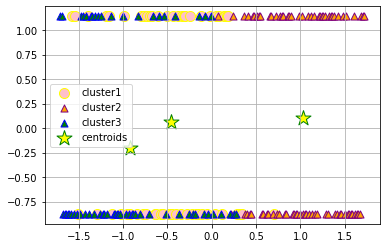

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xt[y_pred==0,0],xt[y_pred==0,1],s=100,c="pink",marker="o",edgecolor="yellow",label="cluster1")
plt.scatter(xt[y_pred==1,0],xt[y_pred==1,1],s=50,c="orange",marker="^",edgecolor="purple",label="cluster2")
plt.scatter(xt[y_pred==2,0],xt[y_pred==2,1],s=50,c="green",marker="^",edgecolor="blue",label="cluster3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="yellow",edgecolor="green",label="centroids")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# *PCA*

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39.0
1,2,1,21,15.0,81.0
2,3,0,20,16.0,6.0
3,4,0,23,16.0,77.0
4,5,0,31,17.0,40.0


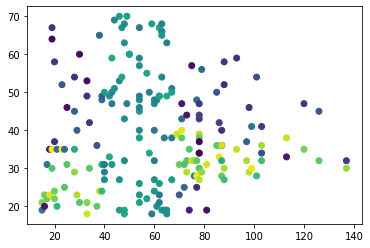

In [ ]:
import matplotlib.pyplot as plt
x=df.drop("Spending Score (1-100)",axis=1)
y=df["Spending Score (1-100)"]
plt.scatter(x["Annual Income (k$)"],x["Age"],c=y)
plt.show()
#x = pd.DataFrame(x["Annual Income (k$)"],x["Age"],columns=['PC1','PC2','PC3','PC4'])
#x.head()

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39.0
1,2,1,21,15.0,81.0
2,3,0,20,16.0,6.0
3,4,0,23,16.0,77.0
4,5,0,31,17.0,40.0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
sc = StandardScaler()
x_sc=sc.fit_transform(x)
x_pca=pca.fit_transform(x_sc)
#sc = pd.DataFrame(sc.fit_transform(x))

#data_pca=pca.fit_transform(sc)
df_pca= pd.DataFrame(x_pca,columns=['PC1','PC2'])
plot = plt.scatter(x_pca['PC1'],x_pca['PC2'],c=y)
x_pca.head()


ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
x=df.drop("Spending Score (1-100)",axis=1)
y=df["Spending Score (1-100)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
sc=StandardScaler()
x_scal=sc.fit_transform(x)
pca=PCA(n_components=2)
pca.fit(x,y)
x_pca=pca.fit_transform(x_scal)
pr_df=pd.DataFrame(x_pca,columns=['PC1','PC2'])
pr_df.head()

ValueError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
sc=StandardScaler()
x=df.drop("Spending Score (1-100)",axis=1)
y=df["Spending Score (1-100)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
mlp=MLPClassifier(alpha=0.1,hidden_layer_sizes=(198,5),max_iter=350,activation="relu",solver="adam")
mlp.fit(x_train,y_train)
y_mm=mlp.predict(yyy)
import matplotlib.pyplot as plt
cn=confusion_matrix(mlp,yyy,y2)
sns.heatmap(cn,annot=True)

ValueError: ignored

In [ ]:
from flask import Flask, request
import sqlite3

# Connect to database or create it if it doesn't exist
conn = sqlite3.connect('students.db')

# Create table to store student information
conn.execute('''CREATE TABLE IF NOT EXISTS students
                (roll_number INTEGER PRIMARY KEY,
                name TEXT NOT NULL,
                phone_number TEXT,
                email TEXT NOT NULL,
                attendance INTEGER DEFAULT 0)''')

# Create Flask app instance
app = Flask(__name__)

# Add a student to the database and return a success message
@app.route('/add_student', methods=['POST'])
def add_student():
    data = request.json
    roll_number = data['roll_number']
    name = data['name']
    phone_number = data['phone_number']
    email = data['email']
    conn.execute("INSERT INTO students (roll_number, name, phone_number, email) VALUES (?, ?, ?, ?)",
                (roll_number, name, phone_number, email))
    conn.commit()
    return {"message": "Student added successfully!"}

# Mark attendance for a student and return a success message
@app.route('/mark_attendance', methods=['POST'])
def mark_attendance():
    data = request.json
    roll_number = data['roll_number']
    conn.execute("UPDATE students SET attendance = attendance + 1 WHERE roll_number = ?", (roll_number,))
    conn.commit()
    return {"message": "Attendance marked successfully!"}

# View all students in the database and return a JSON response
@app.route('/view_students', methods=['GET'])
def view_students():
    cursor = conn.execute("SELECT * FROM students")
    students = []
    for row in cursor:
        student = {}
        student['roll_number'] = row[0]
        student['name'] = row[1]
        student['phone_number'] = row[2]
        student['email'] = row[3]
        student['attendance'] = row[4]
        students.append(student)
    return {"students": students}

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)

# Close the database connection when done
conn.close()


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
